In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import requests
import requests
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
%matplotlib inline

# Analysing the house rent dataset

In [19]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [20]:
#analysing the first 5 rows of the house rent dataset
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [21]:
#analysing the last 5 rows of the house rent dataset
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [22]:
#using info() to understand the data type of the columns. To check whether null elements occur.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [23]:
#describe() is used to get statistics of the dataset such as mean, count, std
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [58]:
#Returns the median of the columns
df.median()

BHK             2.0
Rent        15000.0
Size          800.0
Bathroom        2.0
dtype: float64

In [53]:
#Returns the mean of the columns
df.mean()

BHK             1.990009
Rent        21679.227975
Size          890.113987
Bathroom        1.841281
dtype: float64

In [65]:
#Returns the mode
print(df.mode())

    Posted On  BHK   Rent  Size       Floor   Area Type Area Locality  \
0  2022-07-06    2  15000  1000  1 out of 2  Super Area    Gachibowli   

      City Furnishing Status  Tenant Preferred  Bathroom Point of Contact  
0  Chennai    Semi-Furnished  Bachelors/Family         2    Contact Owner  


In [54]:
#Returns the max of the columns
df.max()

Posted On                         2022-07-11
BHK                                        6
Rent                                   90000
Size                                    4500
Floor                Upper Basement out of 9
Area Type                         Super Area
Area Locality                     whitefield
City                                  Mumbai
Furnishing Status                Unfurnished
Tenant Preferred                      Family
Bathroom                                   7
Point of Contact               Contact Owner
dtype: object

In [55]:
#Returns the min of the columns
df.min()

Posted On                      2022-04-23
BHK                                     1
Rent                                 1200
Size                                   10
Floor                                   1
Area Type                      Built Area
Area Locality         in Boduppal, NH 2 2
City                            Bangalore
Furnishing Status               Furnished
Tenant Preferred                Bachelors
Bathroom                                1
Point of Contact            Contact Agent
dtype: object

In [56]:
#Returns the sample deviation over the columns
df.std()

BHK             0.759460
Rent        17926.052655
Size          507.692525
Bathroom        0.733986
dtype: float64

In [57]:
#Returns the count of non empty elements of each row and column
df.count()

Posted On            4404
BHK                  4404
Rent                 4404
Size                 4404
Floor                4404
Area Type            4404
Area Locality        4404
City                 4404
Furnishing Status    4404
Tenant Preferred     4404
Bathroom             4404
Point of Contact     4404
dtype: int64

In [24]:
#Returns a tuple of the array dimensions i.e. the no of rows, columns
df.shape

(4746, 12)

In [25]:
#Returns the count of null elements in each column and row
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c421670bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c42167c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c421670850>],
 'medians': [<matplotlib.lines.Line2D at 0x1c42167c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c42167cd00>],
 'means': []}

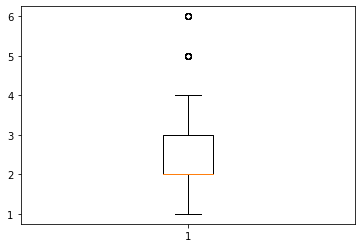

In [26]:
plt.boxplot(df["BHK"])

<AxesSubplot:xlabel='Size', ylabel='Rent'>

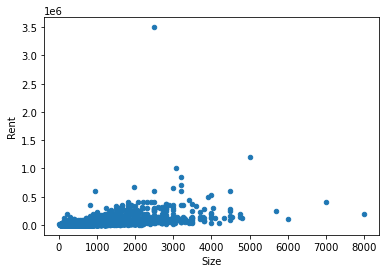

In [27]:
df.plot.scatter(x="Size", y="Rent")

### Through the scatter plot it is evident that there are not many outlier values. The rent is not necessarily varying with the size of the room. We can see there are outliers of this data for example in the case of the room size being only 650 the rent amount was 35000.

# Performing Univariate Analysis on the house rent dataset

# Using boxplot to plot the Rent Column

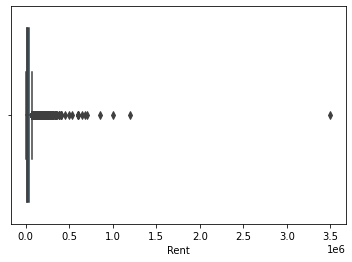

In [28]:
sns.boxplot(x=df["Rent"])
plt.show()

### We can observe that a lot of outliers are existing and it is not easy to visualize the data. To solve this problem we can drop values beyond a range. We can delete values after the rent amount 90000 to better visualise the rent column.

## Cleaning the Rent column

<AxesSubplot:xlabel='Rent'>

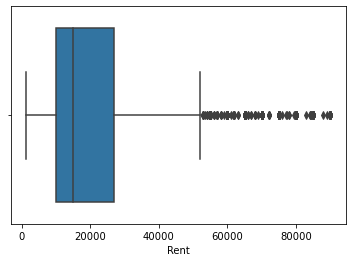

In [40]:
# dropping values from rent that exceed 90000 value
df.drop(df[(df['Rent'] > 90000)].index, inplace = True)
sns.boxplot(x=df['Rent'])

### The Rent column appears much clean and easy to visualize from

# Using boxplot to plot the Size column

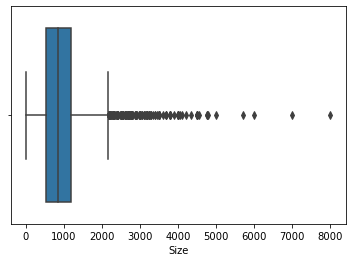

In [29]:
sns.boxplot(x=df["Size"]) 
plt.show()

### Through this plot we can observe most of the size is concentrated at 1000

# Performing Bivariate Analysis on the House Rent Dataset

# Scatter plot against Rent and Furnishing Status

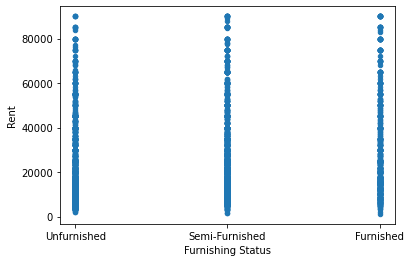

In [42]:
df.plot.scatter(x="Furnishing Status", y="Rent")
plt.show()

### Not much difference when we look at the furnishing status of houses against their Rent

# Scatterplot against Tenant Preffered and Rent

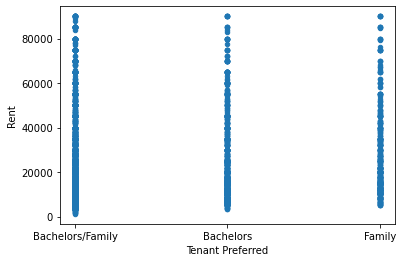

In [43]:
df.plot.scatter(x="Tenant Preferred", y="Rent")
plt.show()

# Result is similar to the previous observation. Not much difference when we look at the type of tenant preferred

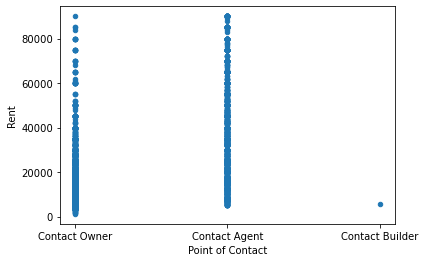

In [46]:
df.plot.scatter(x="Point of Contact", y="Rent")
plt.show()

### We can observe that tenants whose means of contact is through a contact agent, the price of the amount is generally more expensive in comparison to if they are directly contacting the contact owner

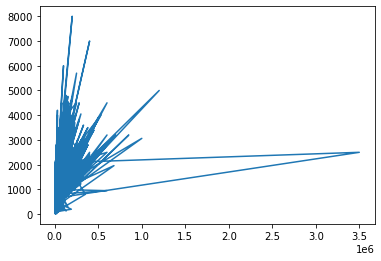

In [30]:
plt.plot(df["Rent"],df["Size"])
plt.show()

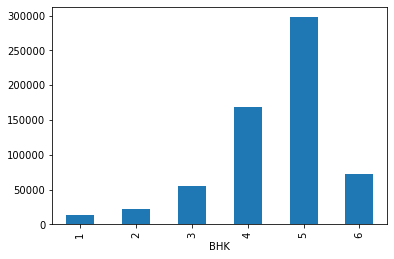

In [31]:
df.groupby("BHK")["Rent"].mean().plot.bar()
plt.show()

## Through the boxplot it is clear around 25% of data is around 16000 Rent amount meanwhile, around 75% of the data is around 32000 Rent amount. Not many outliers are existing in the dataset which is good because it means we don't need to remove any data from the data-set for correct analysis.

# Graph plot between Rent and City

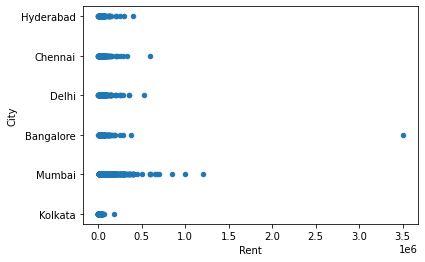

In [32]:
df.plot.scatter(x="Rent", y="City")
plt.show()

## Through this plot we can understand that rent prices are varying according to the city. Outliers existing in Bangalore city and highest rate of increase being in Mumbai city. We can understand more about the dataset after doing the comparison of the furnishing status with the rent amount.

# Box plot against Rent and Furnishing status

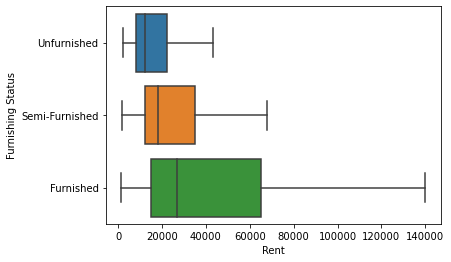

In [34]:
sns.boxplot(x ='Rent', y ='Furnishing Status', data = df, showfliers=False)
plt.show()

## Through the boxplot we can understand that around 25% of furnished houses are lying in the upper range of approximately 23000 the other 75% of furnished houses are lying in the upper range of approximately 62000 rent amount. The same percentage is applicable in case of semi-furnished houses, where 25% of houses's upper range is approximately 18000 and the rest 75% is lying approximately at 26000. 25% of unfurnished houses's rent is lying in the upper range of approximately 15000 while the remaining 75% houses's rent lies in the upper range of approximately 21000.

In [35]:
df[["Size", "Rent","BHK"]].corr()

,Size,Rent,BHK
Size,1.000000,0.413551,0.716145
Rent,0.413551,1.000000,0.369718
BHK,0.716145,0.369718,1.000000


# Heat map plot between Rent, Size, Furnishing Status

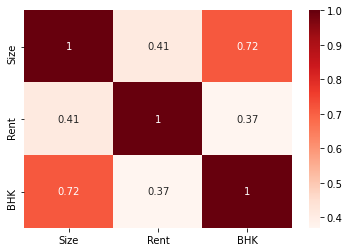

In [36]:
sns.heatmap(df[["Size", "Rent","BHK"]].corr(), annot=True, cmap="Reds")
plt.show()

## Through the heatmap it is easy for us to understand the relationship of rent, size and bhk of the rooms. Rent is moderately varying with size or bhk of the room. Meanwhile we can understand that if the size of the room is more it is most likely that more bhk is being offered to the room. 

In [37]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [38]:
df[df['Rent'] == 0]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact


## The dataset doesn't contain any zero or null values which is beneficial as the need for removing invalid values isn't required. Precise analysis can be done is already done on the given dataset